# K-Means

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


def perform_customer_segmentation(data):
    # Extract relevant features for clustering
    features = data[['Age', 'Gender', 'TotalPurchases', 'AveragePurchaseAmount']]
    
    # Standardize the features to have zero mean and unit variance
    scaler = StandardScaler()
    standardized_features = scaler.fit_transform(features)
    
    # Determine the number of clusters (you can change this as per your requirement)
    num_clusters = 5
    
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    data['Segment'] = kmeans.fit_predict(standardized_features)
    
    return data







In [2]:
data = 2*np.random.rand(100,4)
df = pd.DataFrame(data)
df.columns = ['Age', 'Gender', 'TotalPurchases','AveragePurchaseAmount']

In [3]:
df.head()

,Age,Gender,TotalPurchases,AveragePurchaseAmount
0,1.393752,1.021058,1.800340,0.766283
1,0.602687,1.569625,1.074197,0.871992
2,1.676331,0.759060,0.668139,0.438447
3,0.296369,1.770602,1.149922,0.945797
4,1.065521,0.484205,1.556935,1.711287


# OUTPUT

In [4]:
perform_customer_segmentation(df)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Gender,TotalPurchases,AveragePurchaseAmount,Segment
0,1.393752,1.021058,1.800340,0.766283,4
1,0.602687,1.569625,1.074197,0.871992,3
2,1.676331,0.759060,0.668139,0.438447,2
3,0.296369,1.770602,1.149922,0.945797,3
4,1.065521,0.484205,1.556935,1.711287,4
...,...,...,...,...,...
95,0.104195,0.783636,0.296611,0.951986,1
96,1.854775,0.090908,0.542930,1.428597,2
97,1.677616,0.379505,0.181095,0.087791,2
98,1.171797,1.990531,1.170168,1.940542,0


# TIMES SERIES ANALYSIS

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def sales_forecasting(data, product_id):
    # Filter data for the specific product_id
    product_data = data[data['ProductID'] == product_id].copy()
    
    # Convert the 'Date' column to a datetime type
    product_data['Date'] = pd.to_datetime(product_data['Date'])
    
    # Set the 'Date' column as the DataFrame index
    product_data.set_index('Date', inplace=True)
    
    # Sort the DataFrame by date
    product_data.sort_index(inplace=True)
    
    # Perform ARIMA forecasting
    order = (1, 1, 1)  # You can tune these parameters based on model evaluation
    model = ARIMA(product_data['SalesAmount'], order=order)
    results = model.fit()
    
    # Forecast future sales for the next 12 months
    forecast = results.forecast(steps=12)
    
    # Create a DataFrame with forecasted sales and corresponding dates
    forecast_dates = pd.date_range(start=product_data.index[-1], periods=13, freq='M')[1:]
    forecast_df = pd.DataFrame({'ForecastedSales': forecast}, index=forecast_dates)
    
    # Plot historical sales and forecasted sales
    plt.figure(figsize=(10, 6))
    plt.plot(product_data.index, product_data['SalesAmount'], label='Historical Sales')
    plt.plot(forecast_df.index, forecast_df['ForecastedSales'], label='Forecasted Sales', linestyle='dashed')
    plt.xlabel('Date')
    plt.ylabel('Sales Amount')
    plt.title(f'Sales Forecasting for Product ID: {product_id}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return forecast_df




In [6]:
data = 2*np.random.rand(100,3)
df = pd.DataFrame(data)
df.columns = ['Date', 'ProductID','SalesAmount']

In [7]:
df.head()

,Date,ProductID,SalesAmount
0,1.332577,1.978242,1.503894
1,0.845806,1.337858,1.133827
2,0.665221,1.059497,1.785922
3,0.701254,0.759688,0.010856
4,1.228285,1.767799,0.077092


# OUTPUT

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


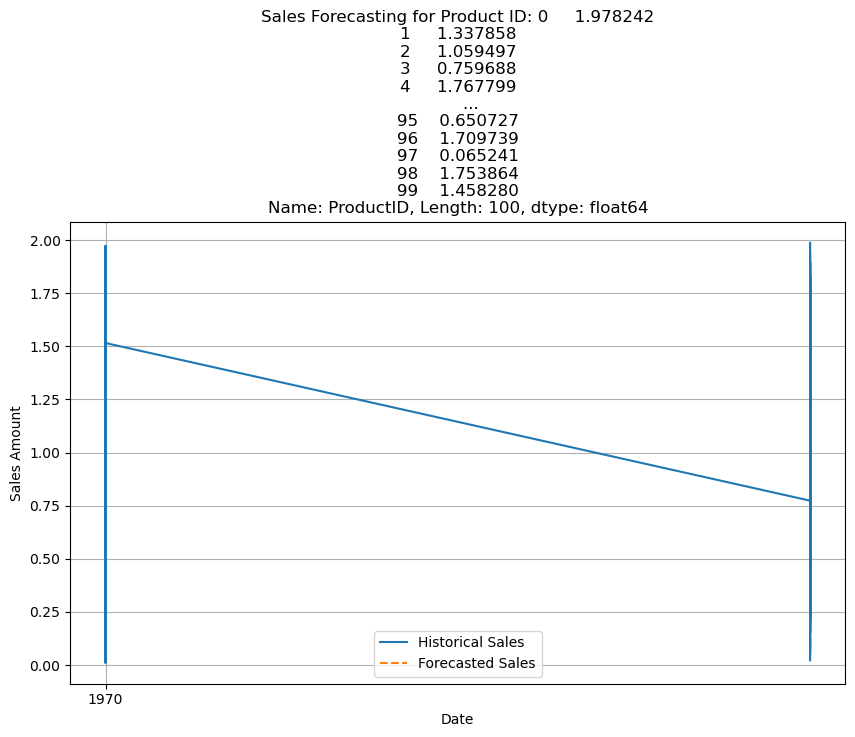

,ForecastedSales
1970-02-28 00:00:00.000000001,NaN
1970-03-31 00:00:00.000000001,NaN
1970-04-30 00:00:00.000000001,NaN
1970-05-31 00:00:00.000000001,NaN
1970-06-30 00:00:00.000000001,NaN
1970-07-31 00:00:00.000000001,NaN
1970-08-31 00:00:00.000000001,NaN
1970-09-30 00:00:00.000000001,NaN
1970-10-31 00:00:00.000000001,NaN
1970-11-30 00:00:00.000000001,NaN


In [8]:
sales_forecasting(df,df['ProductID'])